# EDA

In this Notebook we'll do a short EDA on the data set this project is based on.

In [1]:
# Load libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.io as io
import cv2

In [2]:
# Load DataFrame
MY_PATH = './data/shopee-product-matching'
train = pd.read_csv('./data/shopee-product-matching/train.csv')
train_images = MY_PATH + "/train_images/" + train['image']
train['path'] = train_images
train.head()

,posting_id,image,image_phash,title,label_group,path
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,./data/shopee-product-matching/train_images/00...
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,./data/shopee-product-matching/train_images/00...
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,./data/shopee-product-matching/train_images/00...
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,./data/shopee-product-matching/train_images/00...
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,./data/shopee-product-matching/train_images/00...


First check out the number of unique values in the different columns of the DataFrame.

In [3]:
print('=== train ===')
print('Shape of the DataFrame: {}'.format(train.shape))
print('posting_id: Number of unique values: {}'.format(train['posting_id'].nunique()))
print('path unique values: {}'.format(train['path'].nunique()))
print('image: Number of unique values: {}'.format(train['image'].nunique()))
print('label_group: Number of unique values: {}'.format(train['label_group'].nunique()))
print('image_phash: Number of unique values: {}'.format(train['image_phash'].nunique()))
print('title: Number of unique values: {}'.format(train['title'].nunique()))

=== train ===
Shape of the DataFrame: (34250, 6)
posting_id: Number of unique values: 34250
path unique values: 32412
image: Number of unique values: 32412
label_group: Number of unique values: 11014
image_phash: Number of unique values: 28735
title: Number of unique values: 33117


We see that the number of rows in our DataFrame equals the number of posting_ids. Therefore each product can be unambiguously identified by its posting_id.

Now let's see if there are posting_ids (respectively images, pHashes, titles) which are contained in more than one label group.

In [4]:
# Display the number of posting_ids contained in more than on label group
tmp = train.groupby('posting_id').label_group.count().reset_index()
tmp.columns = ['posting_id', 'count_label_group']
tmp.sort_values(by='count_label_group', ascending=False, inplace=True)
print('Number of posting_ids contained in 1 label group: ', tmp[tmp['count_label_group']==1].shape[0])
print('Number of posting_ids contained in >1 label group: ', tmp[tmp['count_label_group']>1].shape[0])

# Check out the same for images
tmp = train.groupby('image').label_group.nunique().reset_index()
tmp.columns = ['image', 'nunique_label_group']
tmp.sort_values(by='nunique_label_group', ascending=False, inplace=True)
print()
print('Number of images contained in 1 label group: ', tmp[tmp['nunique_label_group'] == 1].shape[0])
print('Number of images contained in >= 2 label groups: ', tmp[tmp['nunique_label_group'] >= 2].shape[0])
print('Number of images contained in >= 3 label groups: ', tmp[tmp['nunique_label_group'] >= 3].shape[0])
print('Number of images contained in >= 4 label groups: ', tmp[tmp['nunique_label_group'] >= 4].shape[0])

# ... for pHashes
tmp = train.groupby('image_phash').label_group.nunique().reset_index()
tmp.columns = ['image_phash', 'nunique_label_group']
tmp.sort_values(by='nunique_label_group', ascending=False, inplace=True)
print()
print('Number of pHashes contained in 1 label group: ', tmp[tmp['nunique_label_group'] == 1].shape[0])
print('Number of pHashes contained in >= 2 label groups: ', tmp[tmp['nunique_label_group'] >= 2].shape[0])
print('Number of pHashes contained in >= 3 label groups: ', tmp[tmp['nunique_label_group'] >= 3].shape[0])
print('Number of pHashes contained in >= 4 label groups: ', tmp[tmp['nunique_label_group'] >= 4].shape[0])
print('Number of pHashes contained in >= 5 label groups: ', tmp[tmp['nunique_label_group'] >= 5].shape[0])

# ... for titles
tmp = train.groupby('title').label_group.nunique().reset_index()
tmp.columns = ['title', 'nunique_label_group']
tmp.sort_values(by='nunique_label_group', ascending=False, inplace=True)
print()
print('Number of titles contained in 1 label group: ', tmp[tmp['nunique_label_group'] == 1].shape[0])
print('Number of titles contained in >= 2 label groups: ', tmp[tmp['nunique_label_group'] >= 2].shape[0])
print('Number of titles contained in >= 3 label groups: ', tmp[tmp['nunique_label_group'] >= 3].shape[0])
print('Number of titles contained in >= 4 label groups: ', tmp[tmp['nunique_label_group'] >= 4].shape[0])
print('Number of titles contained in >= 5 label groups: ', tmp[tmp['nunique_label_group'] >= 5].shape[0])

Number of posting_ids contained in 1 label group:  34250
Number of posting_ids contained in >1 label group:  0

Number of images contained in 1 label group:  32366
Number of images contained in >= 2 label groups:  46
Number of images contained in >= 3 label groups:  2
Number of images contained in >= 4 label groups:  0

Number of pHashes contained in 1 label group:  28588
Number of pHashes contained in >= 2 label groups:  147
Number of pHashes contained in >= 3 label groups:  8
Number of pHashes contained in >= 4 label groups:  2
Number of pHashes contained in >= 5 label groups:  0

Number of titles contained in 1 label group:  33044
Number of titles contained in >= 2 label groups:  73
Number of titles contained in >= 3 label groups:  4
Number of titles contained in >= 4 label groups:  2
Number of titles contained in >= 5 label groups:  1


Display the number of characters respectively words contained in the titles of the products.

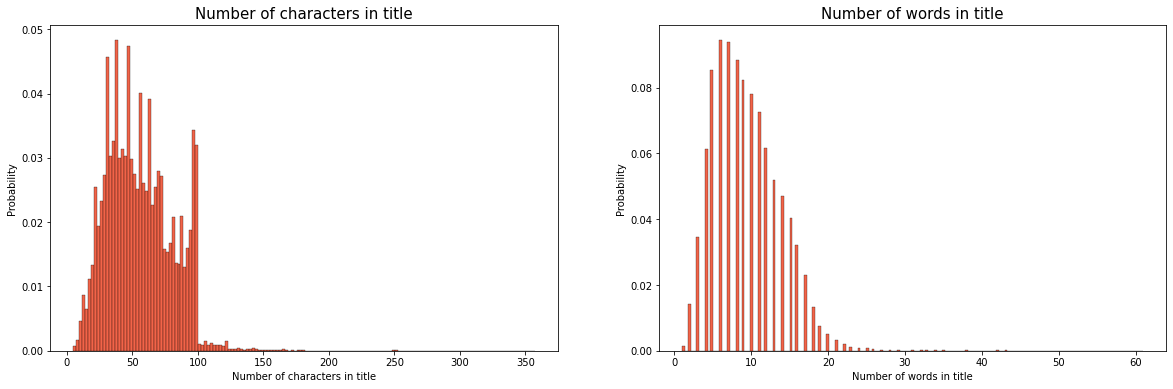

In [5]:
plt_var = train['title'].apply(lambda x: len(x))
plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
plt.title('Number of characters in title', fontsize = '15')
sns.histplot(plt_var, fill = True, 
            color = '#f15335', 
            stat ="probability",
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Number of characters in title')


plt_var = train['title'].apply(lambda x: len(x.split()))
plt.subplot(1,2,2)
plt.title('Number of words in title', fontsize = '15')
sns.histplot(plt_var, fill = True, 
            color = '#f15335', 
            stat ="probability",
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Number of words in title')
plt.show()

Have a look at the size of the label groups (clusters) in our data set

In [6]:
lg_c = train.label_group.value_counts().reset_index()
lg_c.columns = ['label_group', 'count']
lg_c.sort_values(by='count', ascending=False, inplace=True)
lg_c

,label_group,count
0,3627744656,51
4,1141798720,51
6,562358068,51
5,159351600,51
1,1163569239,51
...,...,...
6356,2148246510,2
6355,3038858280,2
6354,97586171,2
6353,4239903747,2


Visualize this information with two plots.

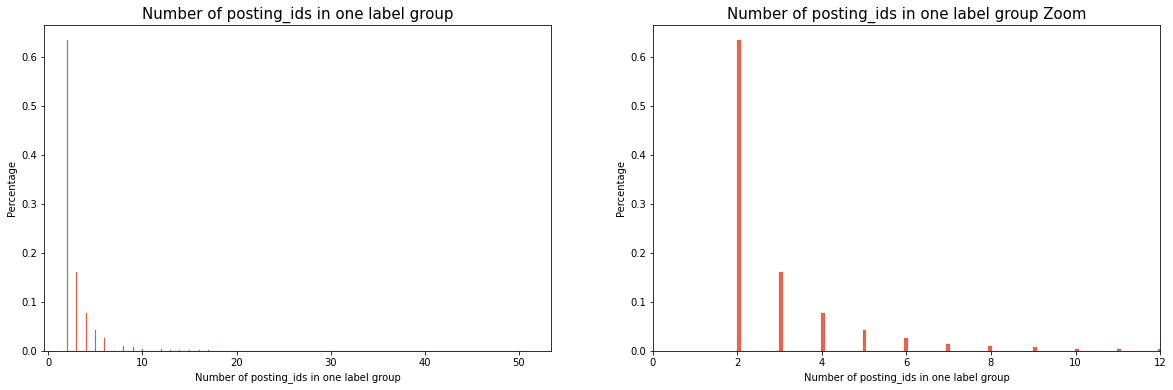

In [7]:
plt_var = train.label_group.value_counts()
plt.figure(figsize = (20, 6))
plt.subplot(1,2,1)
plt.title('Number of posting_ids in one label group', fontsize = '15')
sns.histplot(plt_var, fill = True, 
            color = '#f15335', 
            stat ="probability",
            edgecolor = 'black', alpha = 0.9)

plt.xlabel('Number of posting_ids in one label group')
plt.ylabel('Percentage')

plt.subplot(1,2,2)
plt.title('Number of posting_ids in one label group Zoom', fontsize = '15')
sns.histplot(plt_var, fill = True, 
            color = '#f15335', 
            stat ="probability",
            edgecolor = 'black', alpha = 0.9)
plt.xlabel('Number of posting_ids in one label group')
plt.ylabel('Percentage')
plt.xlim([0,12])
plt.show()

Display the mean and median pixel size of the images.

In [8]:
train['im_size'] = train['path'].apply(lambda x: np.shape(io.imread(x)))
shapes = pd.DataFrame().from_records(train['im_size'])
x = shapes.iloc[:, 0].astype('float32')
y = shapes.iloc[:, 1].astype('float32')
print('mean(x)=', x.mean(), '\t meadian(x)=' , x.median())
print('mean(y)=', x.mean(), '\t meadian(y)=' , y.median())

mean(x)= 753.1108 	 meadian(x)= 700.0
mean(y)= 753.1108 	 meadian(y)= 700.0


Finally we'll have a quick look at some random pictures out of our data set.

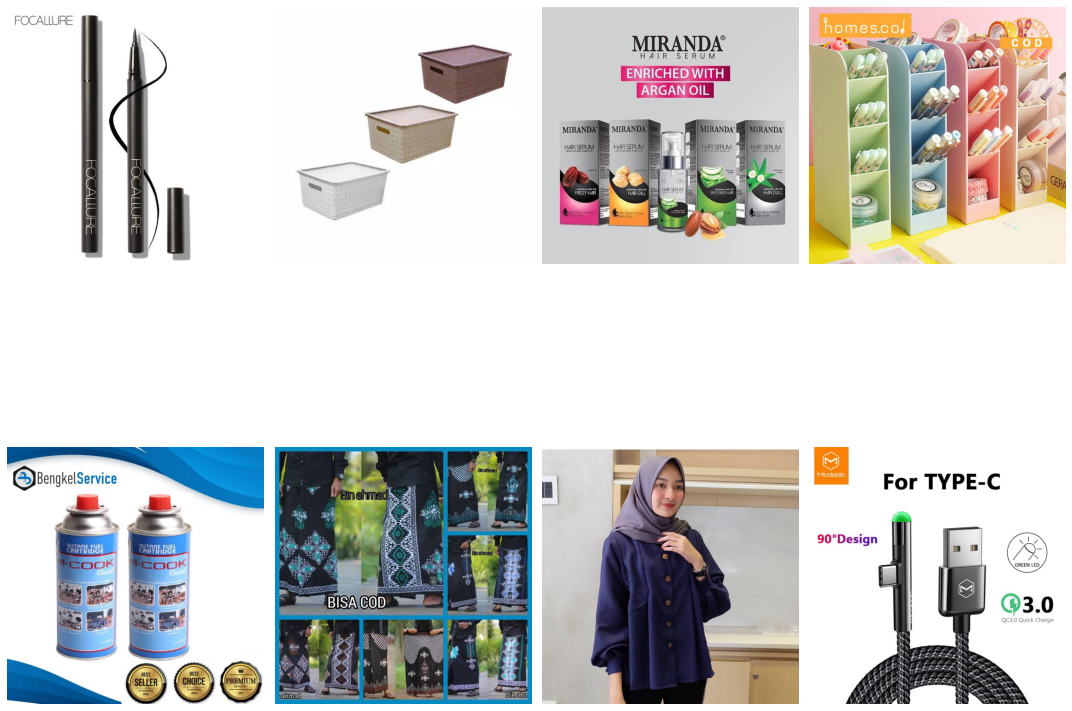

In [9]:
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(2,4,i+1)
    my_rand_int = random.randint(0, train.shape[0])
    image_path = train.path.iloc[my_rand_int]    
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)    
    plt.axis("off")
plt.tight_layout()
plt.show()